<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Jupyter_Notebooks/ReadingDataFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading external datasets from Github

In this example we will show a brief introduction to reading external data files into a Jupyter Notebook, using the Pandas Library.

We will read the *Iris dataset* from Github.

Once located the desired dataset, use the *view raw option* and copy the raw file URL.


In [ ]:
# We load the common libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Will import the Pandas Library for Data Analysis and denote it ad "pd"
import pandas as pd
import pandas_profiling as pp

%matplotlib inline

# Remember "SHIFT+ENTER" computes the cell contents


In [ ]:
# Reading an external csv file using Pandas.

# file_name is the URL of the remote file located in Github or Cyverse
# If using Google Colab, you can upload your dataset to Google Drive

# Dataset in Github
file_name = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv"

# Dataset in Cyverse (Select public link)
#file_name = "https://data.cyverse.org/dav-anon/iplant/home/clizarraga/Datasets/Iris.csv"

# We use the function "read_csv" from Pandas to read the remote CSV file and define it as df (Dataframe).
df = pd.read_csv(file_name)

# We print the first 5 lines of the dataframe
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Print the last 5 rows of the dataframe
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


**NOTE:** The numbers appearing in the first column on the left of Id column is the **row index**, that starts counting from 0 characteristic of Python.

In [ ]:
# What type of Python object is df?
type(df)


pandas.core.frame.DataFrame

In [ ]:
# Print the dataframe column names
print(df.columns)


Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [ ]:
# Show the dataframe structure (Number of rows, Number of columns)
print(df.shape)


(344, 7)


In [ ]:
# Get a general overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


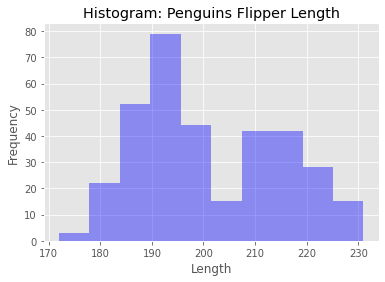

In [ ]:
# Plotting the dataframe
_ = plt.hist(df['flipper_length_mm'], color='blue', alpha=0.4)
#_ = df.plot.hist(bins=12, alpha=0.5)
_ = plt.title('Histogram: Penguins Flipper Length')
_ = plt.xlabel('Length')
_ = plt.ylabel('Frequency')
plt.show()


## Reading the Tucson International Airport Weather Data

One year of data 01-05-2021 to 09-20-2022 downloaded from _Synopticdata.com_ (https://download.synopticdata.com/#a/KTUS) and stored in [Github](https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/KTUS.OneYear.2022-09-30.csv)

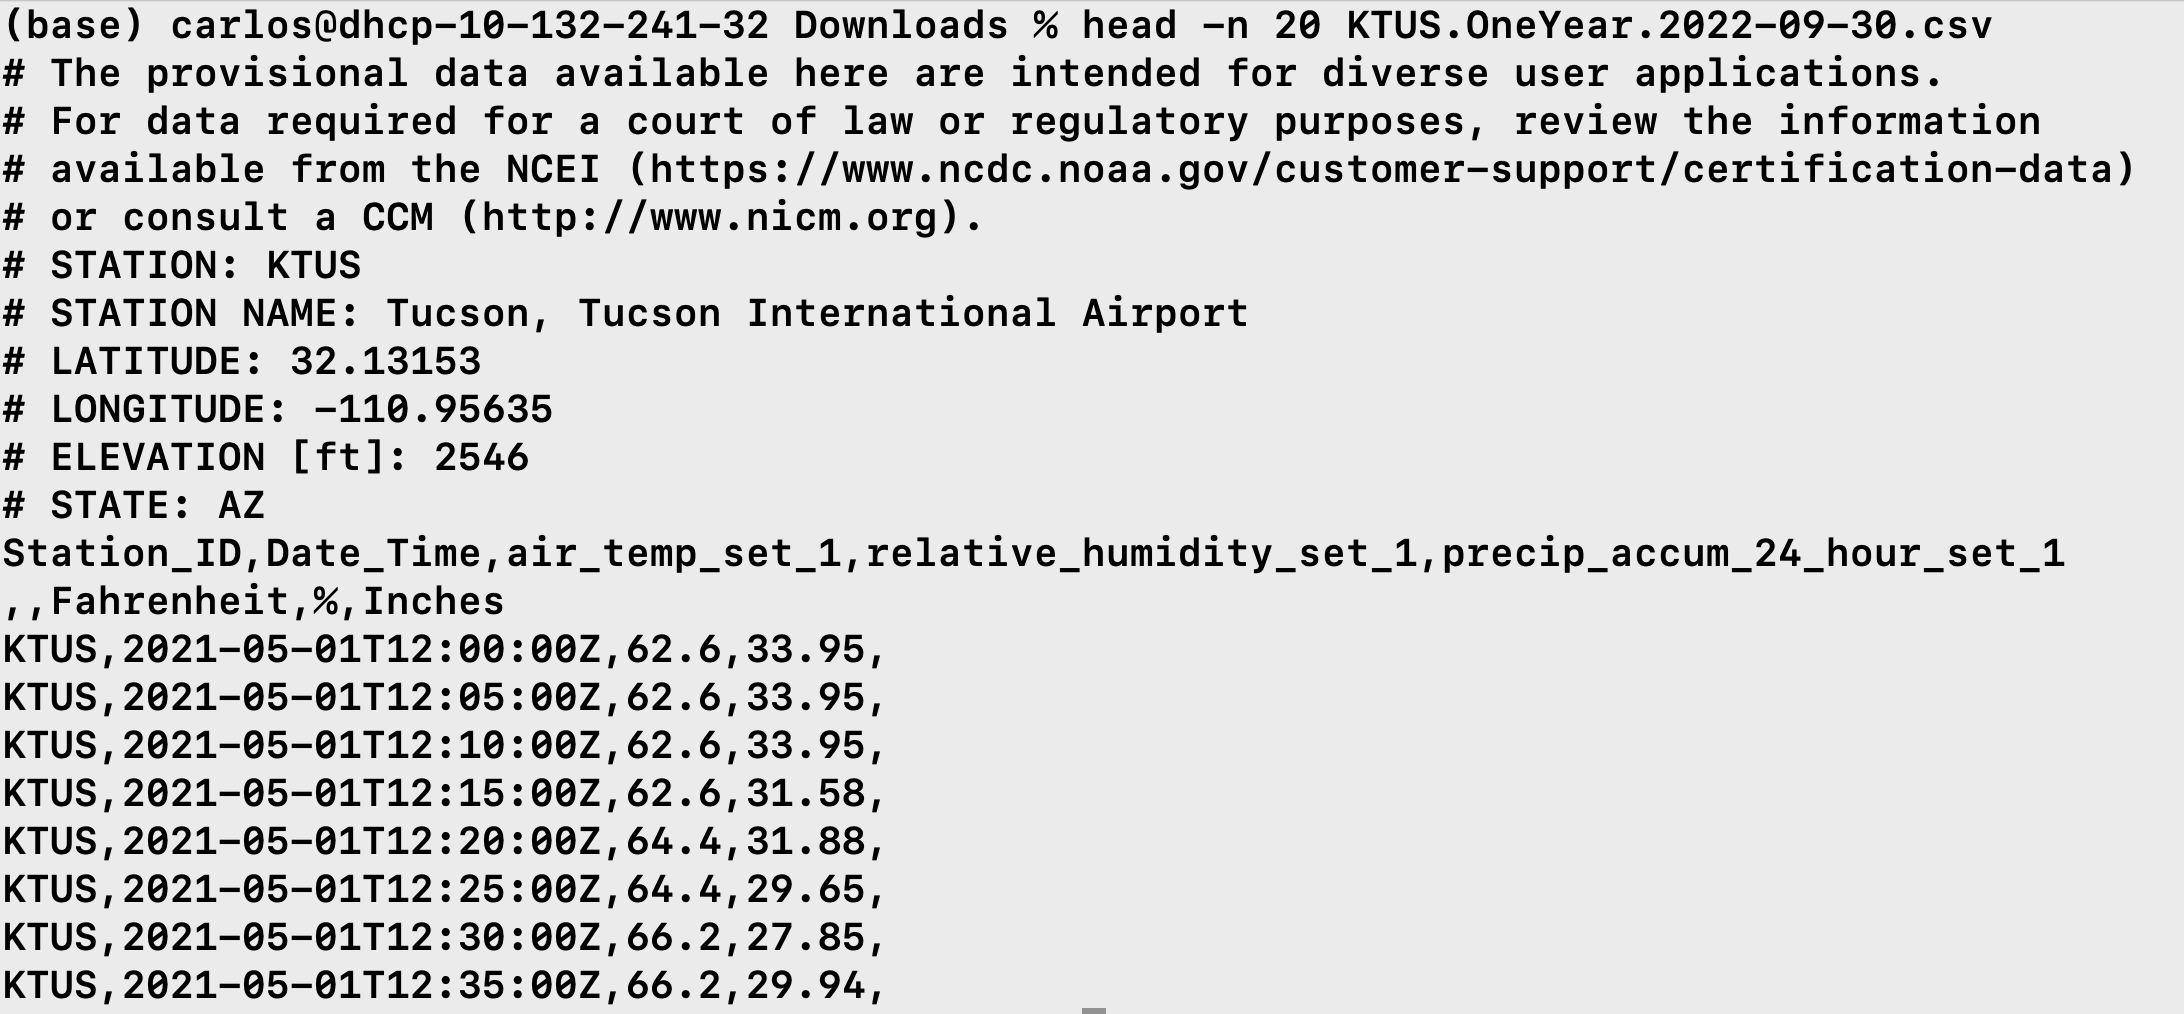

From the command ` head -n 20 KTUS.OneYear.2022-09-30.csv`, we can observe that this file has its first 10 rows with the Metadata information about the Station label & name, Location, Elevation, Location State.     

The name of the variables appear at the 11th line. Then the variable units are given in the 12th line. The weather data is given from line the 13th line till the end of the file.

The [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) provides the tools for extracting the required information, skipping rows.


In [ ]:
# Define remote file location
filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/KTUS.OneYear.2022-09-30.csv"

# Skip 10 lines and read the 11th line and define it as a list of the column names
col_names = list(pd.read_csv(filename, header=10, nrows=0))
col_names


['Station_ID',
 'Date_Time',
 'air_temp_set_1',
 'relative_humidity_set_1',
 'precip_accum_24_hour_set_1']

In [ ]:
# Choosing custom column names
col_names_new = ['Station', 'Date_Time', 'Temp(F)', 'RH(%)', 'Precip(in)']
col_names_new

['Station', 'Date_Time', 'Temp(F)', 'RH(%)', 'Precip(in)']

In [ ]:
# Now we read the rest of the dataset starting after the units row, knowing already the names of the columns.
df_dist = pd.read_csv(filename, header=0, skiprows=11)
df_dist.head()


,Unnamed: 0,Unnamed: 1,Fahrenheit,%,Inches
0,KTUS,2021-05-01T12:00:00Z,62.6,33.95,NaN
1,KTUS,2021-05-01T12:05:00Z,62.6,33.95,NaN
2,KTUS,2021-05-01T12:10:00Z,62.6,33.95,NaN
3,KTUS,2021-05-01T12:15:00Z,62.6,31.58,NaN
4,KTUS,2021-05-01T12:20:00Z,64.4,31.88,NaN


In [ ]:
# Redefine the names of the columns (variables)
df_dist.columns = col_names_new
df_dist.head()


,Station,Date_Time,Temp(F),RH(%),Precip(in)
0,KTUS,2021-05-01T12:00:00Z,62.6,33.95,NaN
1,KTUS,2021-05-01T12:05:00Z,62.6,33.95,NaN
2,KTUS,2021-05-01T12:10:00Z,62.6,33.95,NaN
3,KTUS,2021-05-01T12:15:00Z,62.6,31.58,NaN
4,KTUS,2021-05-01T12:20:00Z,64.4,31.88,NaN


In [ ]:
# Remove Station column (irrelevant) and rewrite old dataframe
# Create a copy and save original dataframe df_dist
df = df_dist.copy()
df.drop(['Station'], axis=1, inplace=True)
df.head()


,Date_Time,Temp(F),RH(%),Precip(in)
0,2021-05-01T12:00:00Z,62.6,33.95,NaN
1,2021-05-01T12:05:00Z,62.6,33.95,NaN
2,2021-05-01T12:10:00Z,62.6,33.95,NaN
3,2021-05-01T12:15:00Z,62.6,31.58,NaN
4,2021-05-01T12:20:00Z,64.4,31.88,NaN


In [ ]:
# Dimension of dataframe (rows, columns)
df.shape

(159183, 4)

In [ ]:
# How many missing values do we have?
df.isnull().sum()


Date_Time          0
Temp(F)          240
RH(%)            370
Precip(in)    159109
dtype: int64

In [ ]:
# Replace all missing Precipitation values NaN, with zeroes. Function fillna()
df['Precip'] = df['Precip'].fillna(0)
df.head()

,Date_Time,Temp,RH,Precip
0,2021-05-01T12:00:00Z,62.6,33.95,0.0
1,2021-05-01T12:05:00Z,62.6,33.95,0.0
2,2021-05-01T12:10:00Z,62.6,33.95,0.0
3,2021-05-01T12:15:00Z,62.6,31.58,0.0
4,2021-05-01T12:20:00Z,64.4,31.88,0.0


In [ ]:
# When did it rain? It will be accumulated preciptation/24 h.
# Filter dataframe rows by condition
df[df['Precip'] > 0.1]

,Date_Time,Temp,RH,Precip
16709,2021-06-24T11:53:00Z,75.92,81.90,0.17
19528,2021-07-03T11:53:00Z,78.08,68.66,0.11
19848,2021-07-04T11:53:00Z,73.94,90.75,0.39
22044,2021-07-11T11:53:00Z,78.98,64.62,0.52
22681,2021-07-13T11:53:00Z,77.00,71.15,0.40
24871,2021-07-20T11:53:00Z,78.08,73.95,0.16
25789,2021-07-25T11:53:00Z,69.08,96.37,1.52
26111,2021-07-26T11:53:00Z,69.98,84.07,0.99
26741,2021-07-28T11:53:00Z,71.96,84.20,1.29
27375,2021-07-30T11:53:00Z,71.96,87.39,0.31
